In [1]:
%matplotlib inline

# Visualization in Qiskit Experiments v0.5.0+

New visualization module `qiskit_experiments.visualization`. This demo notebook requires v0.5.0+ of Qiskit Experiments.

Contacts:
- Qiskit Slack: @conrad
- GitHub: @conradhaupt


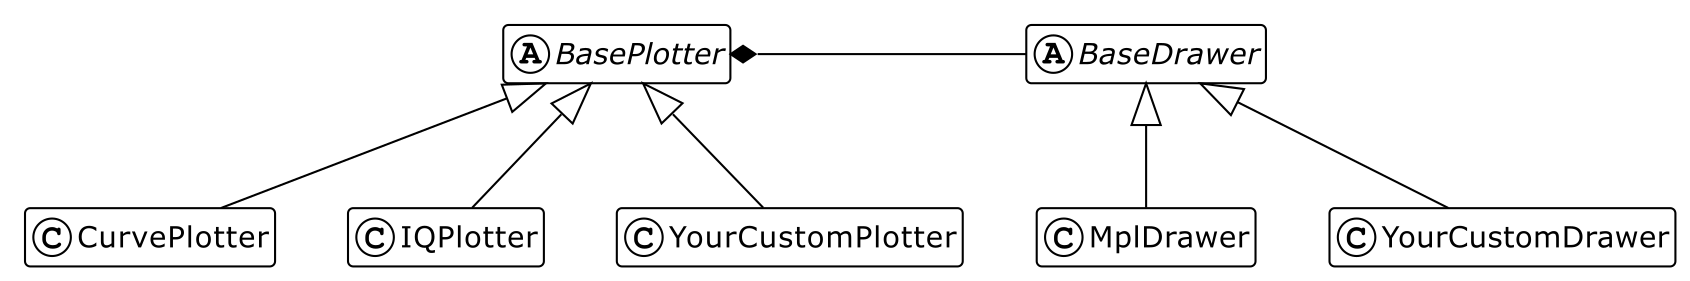

Fig. 1: Rough UML diagram of `qiskit_experiments.visualization` classes.


<div>
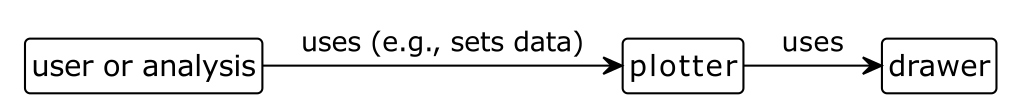
</div>
Fig. 2: Interactions between instances.


Benefits of using `qiskit_experiments.visualization`:

1. Reusable plotting code.
2. Better separation of plotting backend (i.e, Matplotlib & Plotly) from plotting code (i.e. drawing data/graphics).
3. Not specific to `CurveAnalysis`, as was the case with the old visualization code (`qiskit_experiments.curve_analysis.visualization`).


## Curve Plotting


In [2]:
import numpy as np
from qiskit_experiments.visualization import (
    CurvePlotter,
    IQPlotter,
    MplDrawer,
    PlotStyle,
)


Generate dummy data


In [3]:
from generate_data import generate_data

data = generate_data()


Data is split into `series` and `supplementary`:

- **Series Data**: Values from experiment data or analysis instances, or values to be plotted as points,
  lines, etc. A good rule-of-thumb: if it could have a legend entry, it's series data.
- **Supplementary Data**: Values unrelated to a series or curve, only related to the figure. Examples
  include fit-reports, figure-wide text, or metadata.

You can think of the structure of series and supplementary data as dictionaries with the data-keys and
series-names. This is an example for CurvePlotter, representing the dummy data we generated.

```python
series_data = {
    "A": {                      # Series-name 'A'
        "x": ...,               # Data for data-key 'x' and series 'A'
        "y": ...,
        "x_interp": ...,
        "y_interp": ...,
        "y_interp_err": ...,
    },
    "B": {                      # Series-name 'B'
        "x": ...,               # Data for data-key 'x' and series 'B'
        "y": ...,
        "x_interp": ...,
        "y_interp": ...,
    }
}
```

```python
supplementary_data = {
    "primary_results": ...,     # Supplementary data only has a data-key, no series-name.
    "fit_red_chi": ...,
}
```


Data consists of the following data-keys:


In [4]:
data_keys = set()
for _, x in data.items():
    data_keys.update(x.keys())
print(data_keys)


{'y_interp_err', 'x', 'x_interp', 'y_interp', 'y'}


## Generating a figure using a plotter


1. Create plotter and set options and style.
2. Set data.
3. Generate figure.


In [5]:
# Create plotter and set options and style.
plotter = CurvePlotter(MplDrawer())
plotter.set_options(
    plot_sigma=[
        (1.0, 0.5)
    ],  # Controls confidence-intervals for `y_interp_err` data-keys.
)
plotter.set_figure_options(
    series_params={
        "A": {"symbol": "o", "color": "C0", "label": "Qubit 0"},
        "B": {"symbol": "X", "color": "C1", "label": "Qubit 1"},
        "C": {"symbol": "v", "color": "k", "label": "Ideal 0"},
        "D": {"symbol": "^", "color": "k", "label": "Ideal 1"},
    },
    xlabel="Parameter",
    ylabel="${\\langle{}Z\\rangle{}}$",
    figure_title="Expectation Values",
)


Here we plot the figure as we add data, to illustrate what each piece of data is used for. In practice,
all data would be set before calling `plotter.figure()`.


### 0 Blank


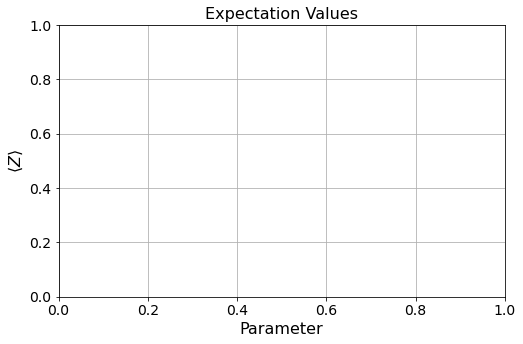

In [6]:
plotter.figure()


### 1 Points for qubit 0.


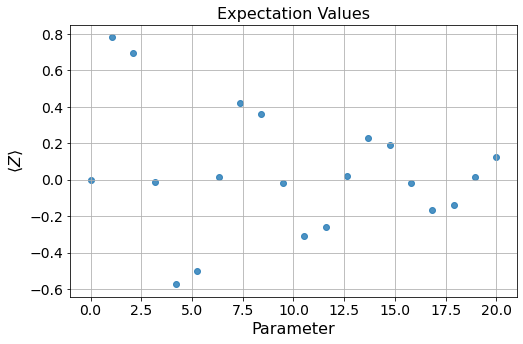

In [7]:
plotter.set_series_data("A", x=data["A"]["x"], y=data["A"]["y"])
plotter.figure()


### 2 Fit for qubit 0.


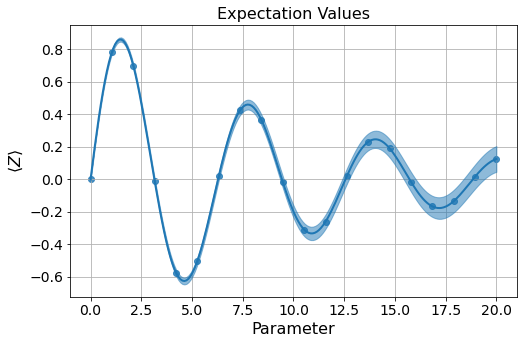

In [8]:
plotter.set_series_data(
    "A",
    x=data["A"]["x"],
    y=data["A"]["y"],
    x_interp=data["A"]["x_interp"],
    y_interp=data["A"]["y_interp"],
    y_interp_err=data["A"]["y_interp_err"],
)
plotter.figure()


### 3 For qubit 1 too.


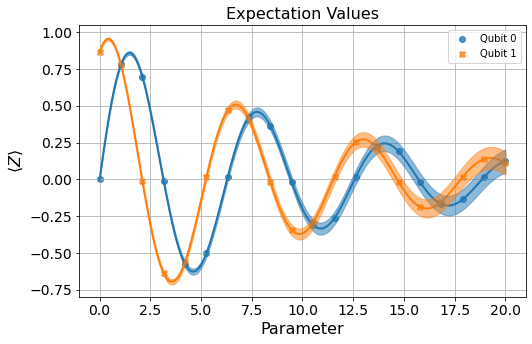

In [9]:
plotter.set_series_data(
    "B",
    x=data["B"]["x"],
    y=data["B"]["y"],
    x_interp=data["B"]["x_interp"],
    y_interp=data["B"]["y_interp"],
    y_interp_err=data["B"]["y_interp_err"],
)
plotter.figure()


### 4 For ideal too.


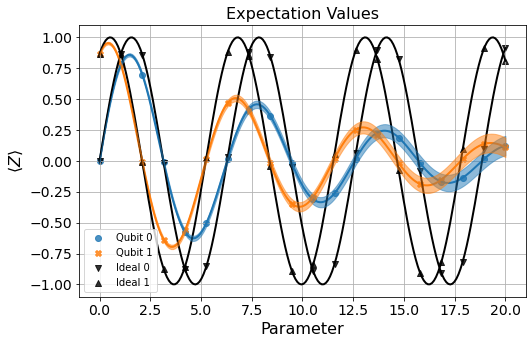

In [10]:
plotter.set_series_data(
    "C",
    x=data["C"]["x"],
    y=data["C"]["y"],
    x_interp=data["C"]["x_interp"],
    y_interp=data["C"]["y_interp"],
)
plotter.set_series_data(
    "D",
    x=data["D"]["x"],
    y=data["D"]["y"],
    x_interp=data["D"]["x_interp"],
    y_interp=data["D"]["y_interp"],
)
plotter.set_options(
    style=PlotStyle(legend_loc="lower left"),
)
plotter.figure()


### 5 Subplots.


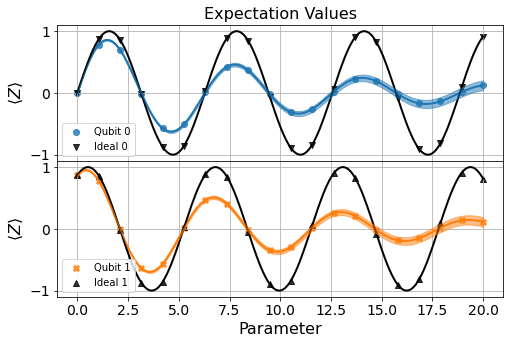

In [11]:
plotter.set_options(subplots=(2, 1))
plotter.set_figure_options(
    series_params={
        "A": {
            "symbol": "o",
            "color": "C0",
            "label": "Qubit 0",
            "canvas": 0,
        },  # Here we add "canvas"
        "B": {
            "symbol": "X",
            "color": "C1",
            "label": "Qubit 1",
            "canvas": 1,
        },  # entries to the
        "C": {
            "symbol": "v",
            "color": "k",
            "label": "Ideal 0",
            "canvas": 0,
        },  # `series_params` figure
        "D": {"symbol": "^", "color": "k", "label": "Ideal 1", "canvas": 1},  # option.
    },
)
plotter.figure()


## IQ Plotter

Here we use an IQ plotter, which plots single-shot and average IQ values for experiments. The dummy data contains dummy data for a qutrit system, that may be encountered during readout calibration to create a qutrit discriminator.


Generate dummy data


In [12]:
from generate_data import generate_iq_data

iq_data, iq_discriminator = generate_iq_data()


IQ data with the following data-keys:


In [13]:
data_keys = set()
for _, x in iq_data.items():
    data_keys.update(x.keys())
print(data_keys)


{'centroid', 'points'}


## Generating a figure using an IQ Plotter


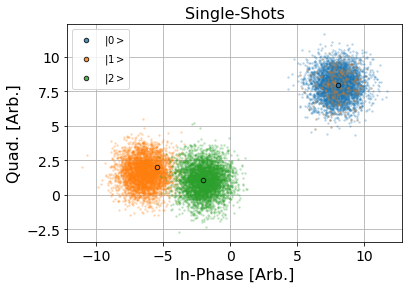

In [15]:
# Create plotter
iq_plotter = IQPlotter(MplDrawer())

# Set options.
iq_plotter.set_options(
    style=PlotStyle(
        figsize=(6, 4),
        legend_loc=None,
        textbox_rel_pos=(0.18, -0.30),
    ),
)
iq_plotter.set_figure_options(
    series_params={
        "0": {"label": "$|0>$"},
        "1": {"label": "$|1>$"},
        "2": {"label": "$|2>$"},
    },
    xlabel="In-Phase",
    ylabel="Quad.",
    xval_unit="Arb.",
    yval_unit="Arb.",
    figure_title="Single-Shots",
)

# Set data.
for series, series_data in iq_data.items():
    iq_plotter.set_series_data(series, **series_data)
# Generate figure.
iq_plotter.figure()


If we add a discriminator, we can plot the state predicted by the discriminator. If the discriminator labels are the same as the series-names for the IQPlotter, the colours will match the scatter points.


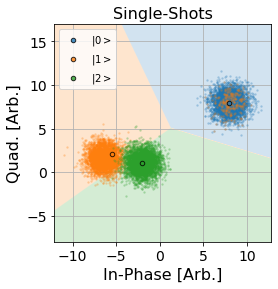

In [17]:
iq_plotter.set_supplementary_data(discriminator=iq_discriminator)
iq_plotter.figure()


### Combine Plotters

Plotters have an `axis` option which is the axis object on which to be drawn. This allows multiple plotters to draw to the same base figure.


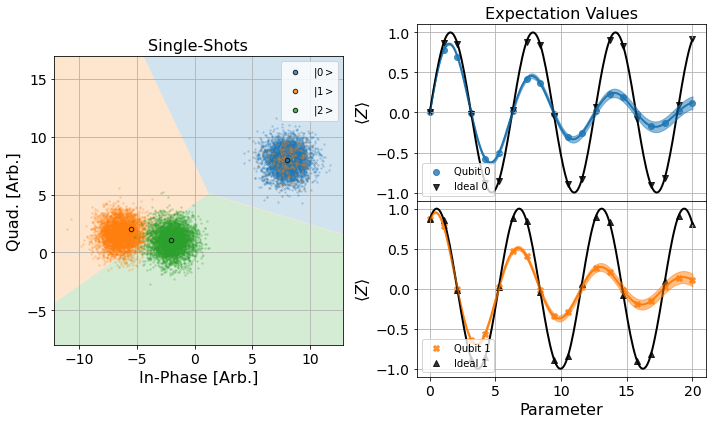

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
plotter.set_options(axis=axes[1])
iq_plotter.set_options(axis=axes[0])

# Generate both figures, which adds graphics to each subplot.
plotter.figure()
iq_plotter.figure()

# Tighten layout
plt.tight_layout()


### Using a plotter in a custom analysis class

1. Create a plotter in `options`.

```python
def _default_options(cls):
    ...
    options.plotter = MyPlotter(MplDrawer())
    ...
    return options
```

2. Call `set_series_data` and `set_supplementary_data` in `_run_analysis`

```python
def _run_analysis(self):
    ...
    if self.options.plot:
        ...
        self.plotter.set_series_data(series_name, ...)
        ...
    ...

    if self.options.plot:
        return analysis_results, [self.plotter.figure()]
    return analysis_results, []
```
